In [50]:
import pandas as pd
import numpy as np

In [51]:
nasdaq_100_returns = pd.read_csv('../../models/backtest/nasdaq_100_returns.csv', parse_dates=True, index_col='date')

In [52]:
dates_to_predict = nasdaq_100_returns.iloc[-10::-10].index

In [53]:
predictions = pd.read_csv('../../models/backtest/predictions.csv', parse_dates=True, index_col=0).T

In [54]:
def built_comp_list(predictions, n=1):
    cmp_dict = {}
    for dt in predictions.columns:
        dt_serie = predictions[dt].sort_values(ascending=False)
        dt_serie_non_zero = dt_serie[dt_serie != 0]
        comp_list = list(dt_serie_non_zero.head(n).index)
        cmp_dict[dt.strftime('%Y-%m-%d')] = comp_list
    return cmp_dict
    

In [56]:
def bckt_time_window(dt, bck_test_df, comp_list):
    comp_series = {}
    for comp in bck_test_df.columns:
        if comp in comp_list:
            comp_series[comp] = bck_test_df[comp][dt:].head(10).sort_index(ascending=False)
        else:
            comp_series[comp] = pd.Series(index=bck_test_df[dt:].head(10).index, data = np.nan)
    return pd.DataFrame(comp_series)

In [57]:
N = 5

In [58]:
top_n = built_comp_list(predictions, n=N)

In [59]:
window_list = []
for dt, comp_list in top_n.items():
    window_list.append(bckt_time_window(dt, nasdaq_100_returns, comp_list))

In [60]:
avg_ret = pd.DataFrame(pd.concat(window_list).mean(axis = 1).sort_index(), columns=['avg_return'])

In [61]:
returns = avg_ret.merge(nasdaq_100_returns['NDX'], left_index=True, right_index=True, how='inner') +1

In [62]:
final_ret = returns.fillna(value=1)

<AxesSubplot:xlabel='date'>

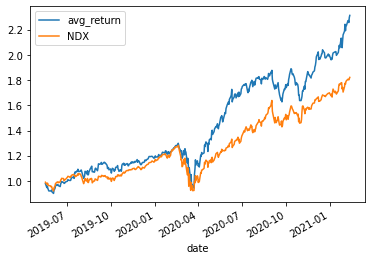

In [63]:
final_ret.cumprod().plot()